# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Make notebook cells wider

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
full_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
full_df['Mouse ID'].nunique()

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Check for duplicates in Mouse ID and Timepoints
duplicate_timepoint = full_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

duplicate_rows = full_df.loc[duplicate_timepoint]

duplicate_ids = duplicate_rows['Mouse ID']
duplicate_ids
# array(['g989'], dtype=object)

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989 = full_df.loc[full_df['Mouse ID'] == 'g989']
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = full_df.drop(full_df[full_df['Mouse ID'] == 'g989'].index)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice in the clean DataFrame.

clean_df['Mouse ID'].nunique()

248

In [74]:
clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen

grouped_df = clean_df.groupby('Drug Regimen')

tumor_volume_df = pd.DataFrame({
     'Mean Tumor Volume' : grouped_df['Tumor Volume (mm3)'].mean(),
     'Median Tumor Volume' : grouped_df['Tumor Volume (mm3)'].median(),
     'Tumor Volume Variance' : grouped_df['Tumor Volume (mm3)'].var(),
     'Tumor Volume Std. Dev.' : grouped_df['Tumor Volume (mm3)'].std(),
     'Tumor Volume Std. Err.' : grouped_df['Tumor Volume (mm3)'].sem()
     })

tumor_volume_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line.

tumor_vol_summary_df = grouped_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
tumor_vol_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

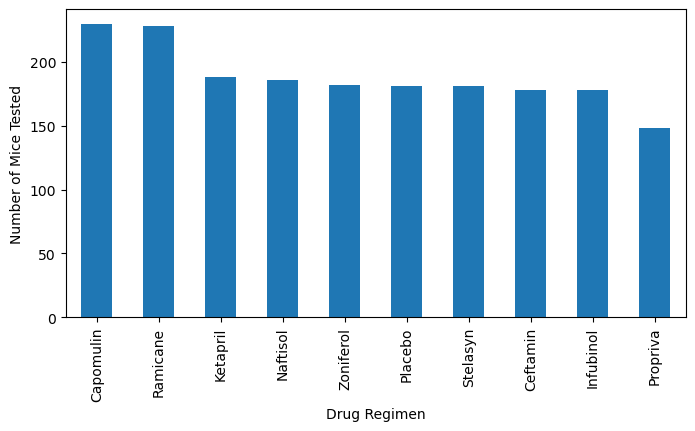

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug 
# regimen using Pandas.

total_timepoints = grouped_df[['Mouse ID']].count().sort_values(by='Mouse ID' ,ascending=False)

pandas_bar_chart = total_timepoints.plot(kind='bar', figsize = (8,4), legend=False)

pandas_bar_chart.set_ylabel('Number of Mice Tested')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

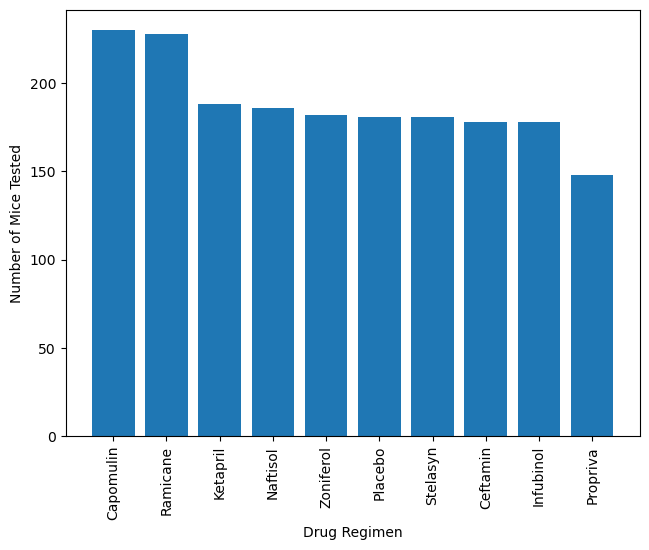

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug 
# regimen using pyplot.
counter = grouped_df['Mouse ID'].count().sort_values(ascending=False)

plt.bar(counter.index, counter.values)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation= 90)

<AxesSubplot:ylabel='Sex'>

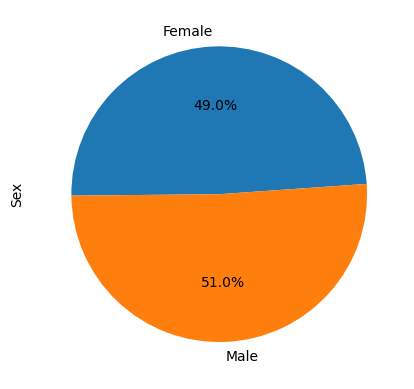

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

grouped_by_sex = clean_df.groupby('Sex').count()
female_vs_male = grouped_by_sex['Mouse ID']

female_vs_male.plot(kind='pie', ylabel='Sex', startangle=4, autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

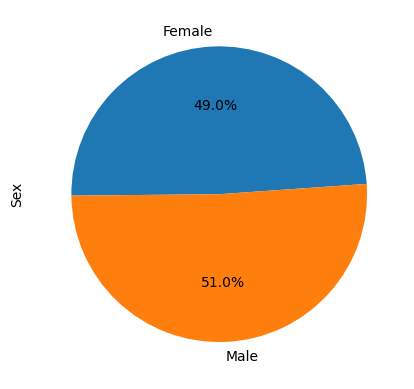

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_by_sex = clean_df.groupby('Sex').count()
female_vs_male = grouped_by_sex['Mouse ID']

plt.pie(female_vs_male, labels=female_vs_male.index, autopct="%1.1f%%", startangle=4)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#-------------
# I used the code balow to get the needed result. However, I included the way was it was suggested to do in the comments below. 

four_regimens = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

grouped_four_regimens = four_regimens.groupby(['Mouse ID', 'Drug Regimen'])

final_tumor_volumes_df = grouped_four_regimens['Tumor Volume (mm3)'].last().to_frame().reset_index().drop(columns='Mouse ID')

final_tumor_volumes_df
#-------------


# Start by getting the last (greatest) timepoint for each mouse

# grouped_four_regimens = four_regimens.groupby(['Mouse ID'])['Timepoint'].max() 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# four_regimens_merged_df = pd.merge(clean_df, grouped_four_regimens, how='right', 
#                                    left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])

# tumor_volume_df = four_regimens_merged_df[four_regimens_merged_df['Drug Regimen'].isin(four_regimens['Drug Regimen'])][
#     ["Drug Regimen", "Tumor Volume (mm3)"]]

# tumor_volume_df


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [63]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
        
    # Determine outliers using upper and lower bounds    

for treatment in treatments_list:
    
    tumor_vol = final_tumor_volumes_df.loc[final_tumor_volumes_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds    
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}'s potential outliers: {tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'Drug Regimen')

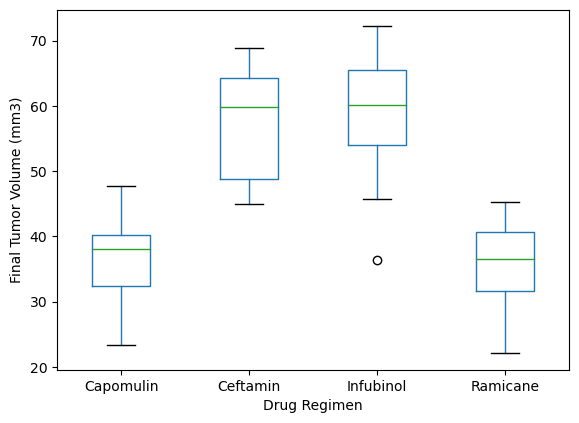

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volume_drag_reg_boxplot = final_tumor_volumes_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid=False)
plt.title('')
plt.suptitle('')
tumor_volume_drag_reg_boxplot.set_ylabel("Final Tumor Volume (mm3)")
tumor_volume_drag_reg_boxplot.set_xlabel("Drug Regimen")


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

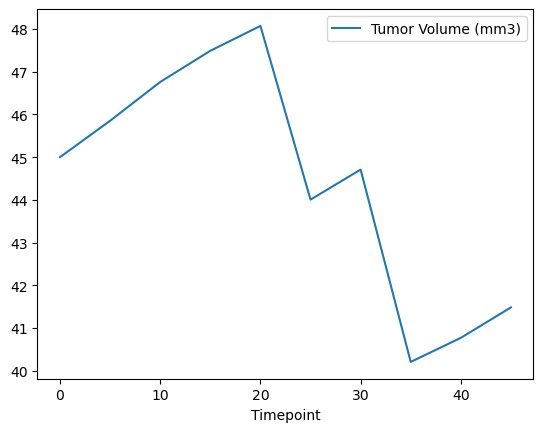

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# locating tumor volume and time point for some mosue
line_plot = clean_df.loc[clean_df['Mouse ID']=='l509'][['Tumor Volume (mm3)', 'Timepoint']]
line_plot.plot('Timepoint')

Text(0, 0.5, 'Average Tumor Volume')

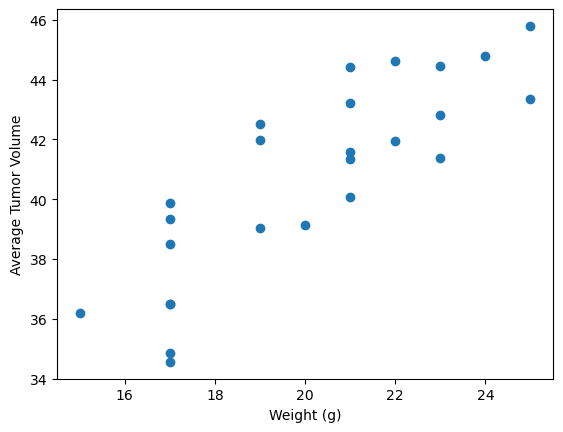

In [158]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Locate Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Group find average tumor volume
capomulin_grouped_df = capomulin_df.groupby(by='Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
plt.scatter(capomulin_grouped_df['Weight (g)'], capomulin_grouped_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')




## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

